# Análise da Atividade Sobre Conceitos Introdutórios da Linguagem de Programação C

Professor(a), com o uso das técnicas de LA, pudemos responder algumas questões para essa etapa. Entre elas:

1. Como podemos identificar o grupo de alunos que estão com dificuldades, e quais o principais erros comentidos por esse alunos durante as atividade de programação? 

Para respondermos essa questão, no nosso exemplo, reunimos os dados extraidos do Banco de Dados da Plataforma Moodle tabela mdl_vpl_submissions, essa tabela continha dados referentes a cada questão das atividades (identificação do usuário, data de entrega, tempo de edição, quantidade de execuções, e nota). Assim, tratamos esses dados usando um Jupyter NoteBook, no qual agrupamos as tentativas de respostas para cada questão de acordo com o aluno, retiramos informações desnecessárias para a análise, além disso, combinamos o DataFrame gerado com os DataFrames das atividades anteriores. Desse modo, analisamos os resultados de 33 alunos, que totalizaram 4597 (quatro mil quinhentos e noventa e sete execuções de código). 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


df = pd.read_csv('vpl_01_limpo_1.csv')

df

,USERID,VPL,ID_vpl,DATESSUBMITTED,COMMENTS,DATEGRADED,GRADE,DATA_ENVIO,DATA_AVALIACAO,NOTA,CONTAGEM,ID_alunos,NAME,ATRASO,ENTREGA_NO_PRAZO,NOME
0,18,40,7953,1682186071,NaN,1682186131,1.000.000,2023-04-22 17:54:31,2023-04-22 17:55:31,10.0,7,40,Questão 01,True,False,Aluno 31
1,18,41,364,1681145789,NaN,1681145794,1.000.000,2023-04-10 16:56:29,2023-04-10 16:56:34,10.0,3,41,Questão 02,False,True,Aluno 31
2,18,42,406,1681146045,NaN,1681146092,1.000.000,2023-04-10 17:00:45,2023-04-10 17:01:32,10.0,2,42,Questão 03,False,True,Aluno 31
3,18,43,422,1681146245,NaN,1681146290,1.000.000,2023-04-10 17:04:05,2023-04-10 17:04:50,10.0,1,43,Questão 04,False,True,Aluno 31
4,18,44,457,1681146545,NaN,1681146553,1.000.000,2023-04-10 17:09:05,2023-04-10 17:09:13,10.0,2,44,Questão 05,False,True,Aluno 31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,56,64,4289,1681505250,NaN,1681505273,1.000.000,2023-04-14 20:47:30,2023-04-14 20:47:53,10.0,1,64,Questão 24,False,True,Aluno 02
882,56,65,4424,1681506217,NaN,1681506250,0,2023-04-14 21:03:37,2023-04-14 21:04:10,0.0,1,65,Questão 25,False,True,Aluno 02
883,56,66,4494,1681506725,NaN,1681506744,1.000.000,2023-04-14 21:12:05,2023-04-14 21:12:24,10.0,1,66,Questão 26,False,True,Aluno 02
884,56,67,5905,1681671963,NaN,1681671979,1.000.000,2023-04-16 19:06:03,2023-04-16 19:06:19,10.0,10,67,Questão 27,False,True,Aluno 02


O código abaixo, representa a análise de desempenho dos alunos. Desse modo, o gráfico resume as tentativas de resposta para cada questão de acordo com o aluno, as linhas representam alunos individuais, as colunas representam as questões especificas, e a escala de cores que varia do amarelo ao azul ilustra a frequência de tentativas de envio, sendo que as cores claras (menos tentativas), indicam que os alunos conseguiram desenvolver os códigos de programação com poucas tentativas. Assim, as cores indicaram a questão era mais fácil ou que os alunos estavam bem-preparados. Por outro lado, as cores mais escuras (mais tentativas) indicando que os alunos precisaram de mais tentativas para resolver a questão, ou porque era mais difícil ou que os alunos tiveram dificuldades com o conceito abordado. Isso nos forneceu valiosos insights sobre o padrão de desempenho e o comportamento dos alunos durante o desenvolvimento das atividades de programação. 

/var/folders/cd/qj686nc9301drth50z2v1p8m0000gn/T/ipykernel_53727/282928690.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



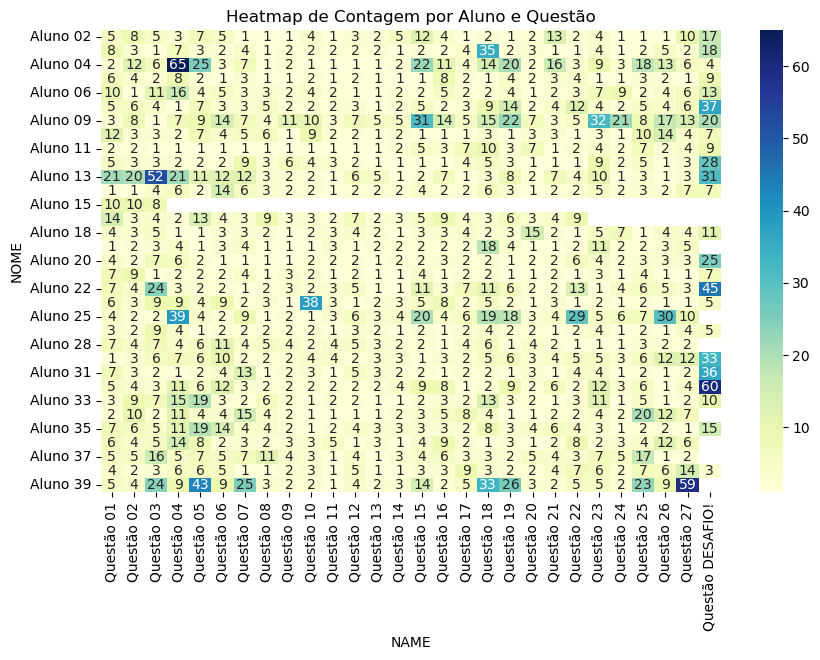

In [3]:
# Passo 2: Use o método pivot para reorganizar os dados
pivot_table = df.pivot('NOME', 'NAME', 'CONTAGEM')


# Passo 3: Crie o heatmap com seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Heatmap de Contagem por Aluno e Questão')
plt.show()

In [4]:
# Passo 2: Agrupar por Aluno e somar as Contagens
total_envios = df.groupby('NOME')['CONTAGEM'].sum().reset_index()

# Passo 3: Ordenar os alunos pelo total de envios em ordem crescente
total_envios = total_envios.sort_values(by='CONTAGEM', ascending=True)

# Passo 4: Converter o DataFrame resultante em uma lista de tuplas (Aluno, Contagem)
lista_envios = total_envios.to_records(index=False).tolist()

print(lista_envios)

[('Aluno 15', 28), ('Aluno 26', 69), ('Aluno 21', 69), ('Aluno 05', 77), ('Aluno 11', 83), ('Aluno 19', 84), ('Aluno 20', 94), ('Aluno 14', 96), ('Aluno 28', 98), ('Aluno 18', 100), ('Aluno 31', 111), ('Aluno 12', 111), ('Aluno 10', 112), ('Aluno 38', 112), ('Aluno 16', 115), ('Aluno 36', 117), ('Aluno 02', 122), ('Aluno 03', 122), ('Aluno 06', 127), ('Aluno 34', 131), ('Aluno 24', 132), ('Aluno 33', 132), ('Aluno 37', 139), ('Aluno 35', 142), ('Aluno 07', 155), ('Aluno 30', 155), ('Aluno 22', 179), ('Aluno 32', 185), ('Aluno 25', 243), ('Aluno 13', 252), ('Aluno 04', 274), ('Aluno 09', 307), ('Aluno 39', 324)]


No código abaixo, realizamos a clusterização dos resultados usando para isso o algoritmo K-Means sobre o conjunto de dados coletados com base nas características da extraídas do dataframe da atividade, sendo elas: 'Aluno, 'Questão', e ‘Contagem Envios’. Essa clusterização nos forneceu informações sobre o comportamento dos alunos na atividade, com base nos atributos apresentado anteriormente.

/Users/josewilkerpereiraluz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



        NOME  CONTAGEM  Cluster
12  Aluno 15        28        2
21  Aluno 26        69        2
17  Aluno 21        69        2
3   Aluno 05        77        2
8   Aluno 11        83        2
15  Aluno 19        84        2
16  Aluno 20        94        2
11  Aluno 14        96        2
22  Aluno 28        98        2
14  Aluno 18       100        2
24  Aluno 31       111        0
9   Aluno 12       111        0
7   Aluno 10       112        0
31  Aluno 38       112        0
13  Aluno 16       115        0
29  Aluno 36       117        0
0   Aluno 02       122        0
1   Aluno 03       122        0
4   Aluno 06       127        0
27  Aluno 34       131        0
19  Aluno 24       132        0
26  Aluno 33       132        0
30  Aluno 37       139        0
28  Aluno 35       142        0
5   Aluno 07       155        0
23  Aluno 30       155        0
18  Aluno 22       179        0
25  Aluno 32       185        0
20  Aluno 25       243        1
10  Aluno 13       252        1
2   Alun

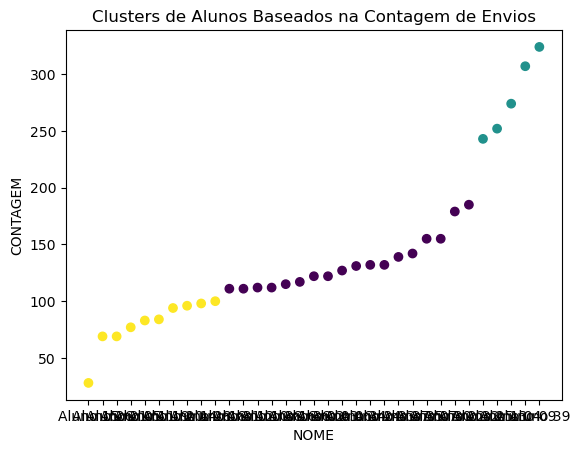

In [5]:
from sklearn.cluster import KMeans

# Passo 3: Aplicar o K-means para clusterizar em 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(total_envios[['CONTAGEM']])
total_envios['Cluster'] = kmeans.labels_

# Passo 4: Mostrar os resultados
print(total_envios)

# Passo 5: Visualização dos clusters
plt.scatter(total_envios['NOME'], total_envios['CONTAGEM'], c=total_envios['Cluster'], cmap='viridis')
plt.xlabel('NOME')
plt.ylabel('CONTAGEM')
plt.title('Clusters de Alunos Baseados na Contagem de Envios')
plt.show()


In [6]:
import plotly.express as px

# Passo 3: Aplicar o K-means para clusterizar em 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(total_envios[['CONTAGEM']])
total_envios['Cluster'] = kmeans.labels_

# Passo 4: Criar o gráfico com plotly.express
fig = px.scatter(total_envios, x='NOME', y='CONTAGEM', color='Cluster', 
                 title='Clusters de Alunos Baseados na Contagem de Envios',
                 labels={'Aluno': 'NOME', 'CONTAGEM': 'CONTAGEM'},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

/Users/josewilkerpereiraluz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [7]:
contagem_total = df['CONTAGEM'].sum()

print(f'A contagem total de envios é: {contagem_total}')

A contagem total de envios é: 4597
